����ģ��
���ѹ����MPa���� 9.35330
����ѹ����MPa����66.56082
����Ħ��ѹ����MPa���� 1.63650
����Ħ��ѹ����MPa���� 7.70082
��ͷѹ����MPa���� 0.01598


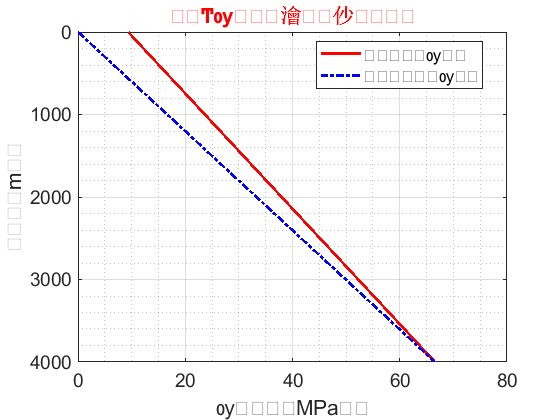

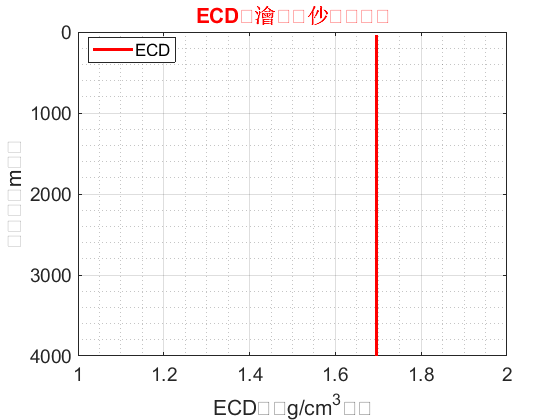

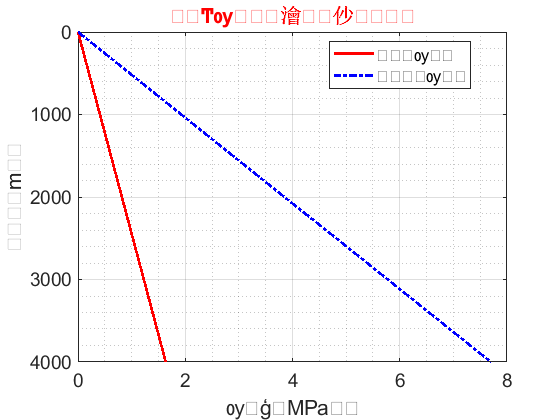

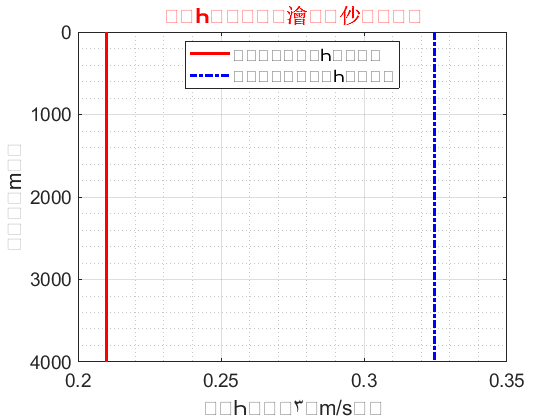

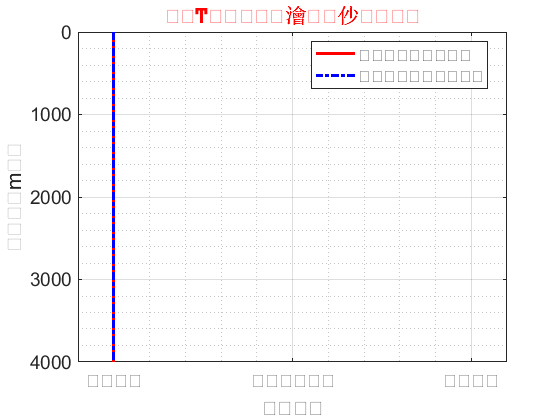

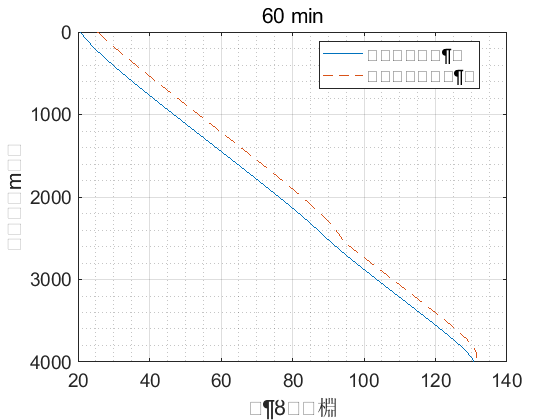

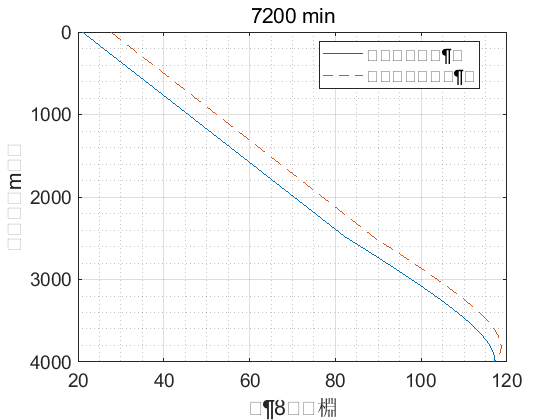

In [1]:
clear all;clc;close all; % �������
cd("D:\桌面\毕设\材料\20221127-结题材料\03-源代码\02 - 井筒压力\02-Bingham\Bingham-NormalTP\ConstantGeometry")
%% �������뼰Ԥ���������ʵ�λ�ƣ�
T_0=20; % T_0Ϊ�����¶ȣ��棩
P_0=101325; % P_0Ϊ����ѹ����Pa��
data_rheology=csvread('RheologyData.csv',1,0); % data_rheology�洢�����¶Ⱥ�ѹ�������µı�����������ճ�ȼ����ݣ���һ��Ϊת�٣��ڶ���Ϊ����������ڱ�ͷ��csvֻ�ܶ�ȡ�����ݣ�1�����ӵ�2�п�ʼ��ȡ��0�����ӵ�1�п�ʼ��ȡ
[tau_y,mu_p_0]=Rheology_Bingham(data_rheology); % ���ݲ����¶ȡ�ѹ�������µı�����������ճ�ȼ����ݣ����ûع鷨����õ�����Ӧ��tau_y��Pa����������mu_p_0��Pa��s��
mu_0=Rheology_Newtonian(data_rheology); % ���ݲ����¶ȡ�ѹ�������µ�ţ����������ճ�ȼ����ݣ����ûع鷨����õ���mu_0��Pa��s��

welldepth=4000; % ���m
nx=100; % �ռ�������
Nx=nx+1; % �ռ�ڵ���
Depth(1)=0; % �ռ�ڵ㣬m
for i=1:Nx-1
    dz(i)=welldepth/(Nx-1); % �ռ䲽����m
    Depth(i+1)=Depth(i)+dz(i); % �ռ�ڵ㣬m
end

for i=1:Nx
    theta(i)=0; % thetaΪ��б�ǣ��㣩����Ǧ����Ϊ��ʼ��
    theta(i)=theta(i)/180*pi; % ����б�ǵ�λת��Ϊ����
    D_w(i)=0.14; % D_wΪ��Ͳ�ھ���m��
    D_d_o(i)=0.1143; % D_d_oΪ����⾶��m��
    D_d_i(i)=0.10053; % D_d_iΪ����ھ���m��
    A_d(i)=1/4*pi*D_d_i(i)^2; % A_dΪ��˽������m^2��
    A_a(i)=1/4*pi*(D_w(i)^2-D_d_o(i)^2); % A_aΪ���ս������m^2��
end

rho_0=1500; % rho_0Ϊ�����¶ȡ�ѹ���µ��꾮Һ�ܶȣ�kg/m^3��
Qv_0=0.1/60; % �꾮Һ���������m^3/s��
Qm_0=Qv_0*rho_0; % ML_0Ϊ�����¶ȡ�ѹ���µ��꾮Һ����������kg/s��
g=9.81; % gΪ�������ٶȣ�m/s^2��

%% �¶ȼ���
[T_a_T,T_d_T,Depth_T,Time_T]=Temperature(welldepth,rho_0,mu_0,Qv_0); % �����¶ȳ������������¶ȣ��棩�������¶ȣ��棩���ռ�ڵ㣨m����ʱ��ڵ㣨s����

%% ��ֵ����ռ�ڵ�Depth��Ӧ�Ļ����¶�T_A�͹����¶�T_D
[r,c]=size(T_a_T);
for t=1:1:c
    for x=1:1:Nx
        for i=1:1:r-1
            if Depth(x)>=Depth_T(i) && Depth(x)<Depth_T(i+1)
                T_A(x,t)=T_a_T(i,t)+(T_a_T(i+1,t)-T_a_T(i,t))*(Depth(x)-Depth_T(i))/(Depth_T(i+1)-Depth_T(i)); % �����꾮Һ�¶ȣ���
                T_D(x,t)=T_d_T(i,t)+(T_d_T(i+1,t)-T_d_T(i,t))*(Depth(x)-Depth_T(i))/(Depth_T(i+1)-Depth_T(i)); % �����꾮Һ�¶ȣ���
            elseif Depth(x)==Depth_T(i+1)
                T_A(x,t)=T_a_T(i+1,t); % �����꾮Һ�¶ȣ���
                T_D(x,t)=T_d_T(i+1,t); % �����꾮Һ�¶ȣ���
            end
        end
    end
end

T_a=T_A(:,c); % ĩ̬�����꾮Һ�¶ȣ���
T_d=T_D(:,c); % ĩ̬�����꾮Һ�¶ȣ���

%% ����ѹ������
% 1�������ڣ�Nx��������
% P_aΪ����ѹ����Pa��,V_aΪ�������꾮Һ�ٶȣ�m/s����A_aΪ�����ڽ������m^2����mu_p_aΪ�������꾮Һ�������ȣ�Pa��s��,Ff_aΪ�����ڵ�λ�����ϵ�ѹ����Pa/m��
P_a(1)=0; % ���ճ���ѹ��Ϊ0���������0�������Ǳ�ѹ��ʵ��ѹ��Ϊһ������ѹ
rho_a(1)=Density_TP(rho_0,T_0,P_0,T_a(1),P_a(1)); % ���㻷���е�ǰ������ܶ�
V_a(1)=Qm_0/rho_a(1)/A_a(1); % �������꾮Һ�ٶ�=�꾮Һ��������/�꾮Һ�ܶ�/�����ڽ����
mu_p_a(1)=Rheology_TP(mu_p_0,T_0,P_0,T_a(1),P_a(1)); % ���㻷���е�ǰ�����������
[Ff_a(1),flow_pattern_a(1)]=Friction_annulus(rho_a(1),V_a(1),mu_p_a(1),tau_y,D_w(1),D_d_o(1),Qm_0); % ���㻷���е�ǰ����ĵ�λ����ѹ�������ͣ�������������

for i=2:Nx
    P_a(i)=P_a(i-1)+rho_a(i-1)*g*cos(theta(i-1))*dz(i-1); % ����ǰһ����ѹ����ǰһ���������꾮Һ����ѹ�������赱ǰ�����ѹ��
    err_P=1; % ����ѹ���ĳ�ʼ��ʹ��������ѭ��
    while abs(err_P)>1e-4 % ѹ���������жϱ�׼
        rho_a(i)=Density_TP(rho_0,T_0,P_0,T_a(i),P_a(i)); % ���㵱ǰ�¶ȡ�ѹ���µĻ����꾮Һ�ܶ�
        V_a(i)=(rho_a(i-1)*V_a(i-1)*A_a(i-1))/(rho_a(i)*A_a(i)); % ���ݻ����������غ㷽�̣����㻷�����꾮Һ����
        mu_p_a(i)=Rheology_TP(mu_p_0,T_0,P_0,T_a(i),P_a(i)); % ���㵱ǰ�¶ȡ�ѹ���µĻ����꾮Һ������
        [Ff_a(i),flow_pattern_a(i)]=Friction_annulus(rho_a(i),V_a(i),mu_p_a(i),tau_y,D_w(i),D_d_o(i),Qm_0); % ���㻷���е�ǰ����ĵ�λ����ѹ�������ͣ�������������
        P_a_new=P_a(i-1)-(rho_a(i)*V_a(i)^2-rho_a(i-1)*V_a(i-1)^2)+dz(i-1)*(rho_a(i-1)*g*cos(theta(i-1))+rho_a(i)*g*cos(theta(i)))/2+dz(i-1)*(Ff_a(i-1)+Ff_a(i))/2; % ���ݻ����ڶ����غ㷽�̣����㻷����ѹ������ֵ
        err_P=abs(P_a_new-P_a(i))/P_a(i); % �������ѹ�����¼���ѹ��֮���������
        P_a(i)=P_a_new; % ���¼���ѹ����ֵ������ѹ��
    end
end

FrictionalPressureDrop_annulus(1)=0; % FrictionalPressureDrop_annulusΪ����Ħ��ѹ��
for i=2:Nx
    FrictionalPressureDrop_annulus(i)=FrictionalPressureDrop_annulus(i-1)+Ff_a(i)*dz(i-1); % �ؾ���Ի���Ħ��ѹ���ۼ����
end

%% ��ͷѹ������
C=0.95; % CΪ��������ϵ��
d_nozzle=12.7; % d_nozzleΪ����ֱ����mm��
d_nozzle=d_nozzle/1000; % ������ֱ����λ��mmת��Ϊm
m_nozzle=3; % m_nozzleΪ�������
delta_P_bit=Bit_PressureDrop(C,d_nozzle,m_nozzle,Qv_0,rho_0); % ������ͷѹ����ʽ��������ͷѹ��delta_P_bit��Pa��

%% ���ѹ������
% 1�������ڣ�Nx��������
% P_dΪ���ѹ����Pa��,V_dΪ������꾮Һ�ٶȣ�m/s����A_dΪ����ڽ������m^2����mu_p_dΪ������꾮Һ�������ȣ�Pa��s��,Ff_dΪ����ڵ�λ�����ϵ�ѹ����Pa/m��
P_d(Nx)=P_a(Nx)+delta_P_bit; % ����ھ���ѹ��=�����ھ���ѹ��+��ͷѹ��
rho_d(Nx)=Density_TP(rho_0,T_0,P_0,T_d(Nx),P_d(Nx)); % ��������е�ǰ������ܶ�
V_d(Nx)=(rho_a(Nx)*V_a(Nx)*A_a(Nx))/(rho_d(Nx)*A_d(Nx)); % ������꾮Һ����=��������/�ܶ�/����ڽ����
mu_p_d(Nx)=Rheology_TP(mu_p_0,T_0,P_0,T_d(Nx),P_d(Nx)); % ��������е�ǰ�����������
[Ff_d(Nx),flow_pattern_d(Nx)]=Friction_drillpipe(rho_d(Nx),V_d(Nx),mu_p_d(Nx),tau_y,D_d_i(Nx),Qm_0); % ��������е�ǰ����ĵ�λ����ѹ�������ͣ�������������

for i=Nx-1:-1:1
    P_d(i)=P_d(i+1)-rho_d(i+1)*g*cos(theta(i+1))*dz(i); % ����ǰһ����ѹ����ǰһ���������꾮Һ����ѹ�������赱ǰ�����ѹ��
    err_P=1; % ����ѹ���ĳ�ʼ��ʹ��������ѭ��
    while abs(err_P)>1e-4 % ѹ���������жϱ�׼
        rho_d(i)=Density_TP(rho_0,T_0,P_0,T_d(i),P_d(i)); % ���㵱ǰ�¶ȡ�ѹ���µ�������꾮Һ�ܶ�
        V_d(i)=(rho_d(i+1)*V_d(i+1)*A_d(i+1))/(rho_d(i)*A_d(i)); % ��������������غ㷽�̣�����������꾮Һ����
        mu_p_d(i)=Rheology_TP(mu_p_0,T_0,P_0,T_d(i),P_d(i)); % ���㵱ǰ�¶ȡ�ѹ���µ�������꾮Һ������
        [Ff_d(i),flow_pattern_d(i)]=Friction_drillpipe(rho_d(i),V_d(i),mu_p_d(i),tau_y,D_d_i(i),Qm_0); % ��������е�ǰ����ĵ�λ����ѹ�������ͣ�������������
        P_d_new=P_d(i+1)+(rho_d(i+1)*V_d(i+1)^2-rho_d(i)*V_d(i)^2)-dz(i)*(rho_d(i)*g*cos(theta(i))+rho_d(i+1)*g*cos(theta(i+1)))/2+dz(i)*(Ff_d(i)+Ff_d(i+1))/2; % ��������ڶ����غ㷽�̣����������ѹ������ֵ
        err_P=abs(P_d_new-P_d(i))/P_d(i); % �������ѹ�����¼���ѹ��֮���������
        P_d(i)=P_d_new; % ���¼���ѹ����ֵ������ѹ��
    end
end

FrictionalPressureDrop_drillpipe(1)=0; % FrictionalPressureDrop_drillpipeΪ���Ħ��ѹ��
for i=2:Nx
    FrictionalPressureDrop_drillpipe(i)=FrictionalPressureDrop_drillpipe(i-1)+Ff_d(i)*dz(i-1); % �ؾ�������Ħ��ѹ���ۼ����
end

%% �����ͼ����ı���
% ���㻷���е���ѭ���ܶ�ECD��Equivalent circulating density��
for i=2:Nx % �ӵڶ�������㿪ʼ���㣬��һ������㴦����Ϊ0
    ECD(i)=P_a(i)/(g*Depth(i)); % ECD=ѹ��/����/�������ٶ�
    ECD(i)=ECD(i)/1000; % ��ECD��λת��Ϊg/cm^3
end

fprintf('����ģ��\n');
fprintf('���ѹ����MPa����%8.5f\n',P_d(1)/10^6); % ������ѹ������MPaΪ��λ
fprintf('����ѹ����MPa����%8.5f\n',P_a(Nx)/10^6); % �������ѹ������MPaΪ��λ
fprintf('����Ħ��ѹ����MPa����%8.5f\n',FrictionalPressureDrop_drillpipe(Nx)/10^6); % ��������Ħ��ѹ������MPaΪ��λ
fprintf('����Ħ��ѹ����MPa����%8.5f\n',FrictionalPressureDrop_annulus(Nx)/10^6); % ���������Ħ��ѹ������MPaΪ��λ
fprintf('��ͷѹ����MPa����%8.5f\n',delta_P_bit/10^6); % �����ͷѹ������MPaΪ��λ

%% ���ƾ�Ͳѹ���澮��仯����
h=figure(1); % ���ƾ�Ͳѹ���澮��仯����
set(h,'name','��Ͳѹ���澮��仯����','Numbertitle','off'); % ��Figure�Ĵ�������
plot(P_d/10^6,Depth,'r-','LineWidth',2); % ���������ѹ���澮��仯
hold on; % ��������
plot(P_a/10^6,Depth,'b-.','LineWidth',2); % ���ƻ�����ѹ���澮��仯
hold off; % �滻����
set(gca,'YDir','reverse'); % ��Y�����ᷴת
title('��Ͳѹ���澮��仯����','FontWeight','Bold','Color','r'); % �������߱���
xlabel('ѹ����MPa��'); % ����X���������
ylabel('���m��'); % ����Y���������
legend('�����ѹ��','������ѹ��','Location','Best'); % ����ͼ����λ��
set(gca,'FontSize',14); % �������ִ�С��ͬʱӰ���������ע��ͼ���������
box on; % ��ʾ������ı߿�
grid on; % ��ʾ���������������
grid minor; % ��ʾ������Ĵ�������
pan on; % �������ҷ����Figure���һ�ѡ������Ϊԭʼ��ͼ�����ɻָ�
zoom on; % ���ڲ���ͼ���Ź��ߡ�����������ѡ����ʱ�Ŵ󣬰�סAlt��ʱ���������С��˫������ָ�ԭʼ��С������ͼ��С��ԭʼ��Сʱ����������С

%% ����ECD�澮��仯����
h=figure(2); % ����ECD�澮��仯����
set(h,'name','ECD�澮��仯����','Numbertitle','off'); % ��Figure�Ĵ�������
plot(ECD(2:end),Depth(2:end),'r-','LineWidth',2); % ���ƻ�����ECD�澮��仯
xlim([1 2]); % ����X������������
set(gca,'YDir','reverse'); % ��Y�����ᷴת
title('ECD�澮��仯����','FontWeight','Bold','Color','r'); % �������߱���
xlabel('ECD��g/cm^3��'); % ����X���������
ylabel('���m��'); % ����Y���������
legend('ECD','Location','Best'); % ����ͼ����λ��
set(gca,'FontSize',14); % �������ִ�С��ͬʱӰ���������ע��ͼ���������
box on; % ��ʾ������ı߿�
grid on; % ��ʾ���������������
grid minor; % ��ʾ������Ĵ�������
pan on; % �������ҷ����Figure���һ�ѡ������Ϊԭʼ��ͼ�����ɻָ�
zoom on; % ���ڲ���ͼ���Ź��ߡ�����������ѡ����ʱ�Ŵ󣬰�סAlt��ʱ���������С��˫������ָ�ԭʼ��С������ͼ��С��ԭʼ��Сʱ����������С

%% ���ƾ�ͲĦ��ѹ���澮��仯����
h=figure(3); % ���ƾ�Ͳѹ���澮��仯����
set(h,'name','��Ͳѹ���澮��仯����','Numbertitle','off'); % ��Figure�Ĵ�������
plot(FrictionalPressureDrop_drillpipe/10^6,Depth,'r-','LineWidth',2); % ����������꾮Һѹ���澮��仯����
hold on; % ��������
plot(FrictionalPressureDrop_annulus/10^6,Depth,'b-.','LineWidth',2); % ���ƻ������꾮Һѹ���澮��仯����
hold off; % �滻����
set(gca,'YDir','reverse'); % ��Y�����ᷴת
title('��Ͳѹ���澮��仯����','FontWeight','Bold','Color','r'); % �������߱���
xlabel('ѹ�ģ�MPa��'); % ����X���������
ylabel('���m��'); % ����Y���������
legend('���ѹ��','����ѹ��','Location','Best'); % ����ͼ����λ��
set(gca,'FontSize',14); % �������ִ�С��ͬʱӰ���������ע��ͼ���������
box on; % ��ʾ������ı߿�
grid on; % ��ʾ���������������
grid minor; % ��ʾ������Ĵ�������
pan on; % �������ҷ����Figure���һ�ѡ������Ϊԭʼ��ͼ�����ɻָ�
zoom on; % ���ڲ���ͼ���Ź��ߡ�����������ѡ����ʱ�Ŵ󣬰�סAlt��ʱ���������С��˫������ָ�ԭʼ��С������ͼ��С��ԭʼ��Сʱ����������С

%% �����꾮Һ�����澮��仯����
h=figure(4); % �����꾮Һ�����澮��仯����
set(h,'name','�꾮Һ�����澮��仯����','Numbertitle','off'); % ��Figure�Ĵ�������
plot(V_d,Depth,'r-','LineWidth',2); % ����������꾮Һ�����澮��仯����
hold on; % ��������
plot(V_a,Depth,'b-.','LineWidth',2); % ���ƻ������꾮Һ�����澮��仯����
hold off; % �滻����
set(gca,'YDir','reverse'); % ��Y�����ᷴת
title('�꾮Һ�����澮��仯����','FontWeight','Bold','Color','r'); % �������߱���
xlabel('�꾮Һ���٣�m/s��'); % ����X���������
ylabel('���m��'); % ����Y���������
legend('������꾮Һ����','�������꾮Һ����','Location','Best'); % ����ͼ����λ��
set(gca,'FontSize',14); % �������ִ�С��ͬʱӰ���������ע��ͼ���������
box on; % ��ʾ������ı߿�
grid on; % ��ʾ���������������
grid minor; % ��ʾ������Ĵ�������
pan on; % �������ҷ����Figure���һ�ѡ������Ϊԭʼ��ͼ�����ɻָ�
zoom on; % ���ڲ���ͼ���Ź��ߡ�����������ѡ����ʱ�Ŵ󣬰�סAlt��ʱ���������С��˫������ָ�ԭʼ��С������ͼ��С��ԭʼ��Сʱ����������С

%% ���ƾ�Ͳ�����澮��仯����
h=figure(5); % ���ƾ�Ͳ�����澮��仯����
set(h,'name','��Ͳ�����澮��仯����','Numbertitle','off'); % ��Figure�Ĵ�������
plot(flow_pattern_d,Depth,'r-','LineWidth',2); % ����������꾮Һ�����澮��仯����
hold on; % ��������
plot(flow_pattern_a,Depth,'b-.','LineWidth',2); % ���ƻ������꾮Һ�����澮��仯����
hold off; % �滻����
set(gca,'YDir','reverse'); % ��Y�����ᷴת
title('��Ͳ�����澮��仯����','FontWeight','Bold','Color','r'); % �������߱���
xlabel('����'); % ����X���������
xlim([0.8 3.2]) % ����X��̶�������
set(gca,'xtick',[1 2 3]); % ����X��������̶ȣ�1����������2������������3�������������ڱ������ͣ�ֻ�в���������������
set(gca,'xticklabel',{'����','������','����'}); % ��X��������̶ȵ���ֵת��Ϊ��Ӧ�����ַ�
ylabel('���m��'); % ����Y���������
legend('���������','����������','Location','Best'); % ����ͼ����λ��
set(gca,'FontSize',14); % �������ִ�С��ͬʱӰ���������ע��ͼ���������
box on; % ��ʾ������ı߿�
grid on; % ��ʾ���������������
grid minor; % ��ʾ������Ĵ�������
pan on; % �������ҷ����Figure���һ�ѡ������Ϊԭʼ��ͼ�����ɻָ�
zoom on; % ���ڲ���ͼ���Ź��ߡ�����������ѡ����ʱ�Ŵ󣬰�סAlt��ʱ���������С��˫������ָ�ԭʼ��С������ͼ��С��ԭʼ��Сʱ����������С

%% ���ƾ�Ͳ�¶��澮��仯����
h=figure(6); % ���ƾ�Ͳ�¶��澮��仯����
for t = 1:1:length(Time_T)
    plot(T_d_T(:,t),Depth_T,T_a_T(:,t),Depth_T,'--'); % ���ƾ�Ͳ�¶��澮��仯����
    xlabel('�¶ȣ��棩','FontName','����','FontSize',10); % ����X���������
    ylabel('���m��','FontName','����','FontSize',10); % ����Y���������
    title([num2str(Time_T(t)/60),' min']); % �������߱���
    set(gca,'YDir','reverse'); % ��Y�����ᷴת
    legend('������¶�','�������¶�','Location','Best'); % ����ͼ����λ��
    set(gca,'FontSize',14); % �������ִ�С
    box on; % ��ʾ������ı߿�
    grid on; % ��ʾ���������������
    grid minor; % ��ʾ������Ĵ�������
    pan on; % �������ҷ����Figure���һ�ѡ������Ϊԭʼ��ͼ�����ɻָ�
    zoom on; % ���ڲ���ͼ���Ź��ߡ�����������ѡ����ʱ�Ŵ󣬰�סAlt��ʱ���������С��˫������ָ�ԭʼ��С������ͼ��С��ԭʼ��Сʱ����������С
    
    pause(0.001);
end